In [1]:
%config Completer.use_jedi=False

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# подгружаем данные по цветкам ирисов, данные представляют собой словарь где по ключам находятся объекты, нас интересуют свойства цветков и метки их видов
data = load_iris()

In [4]:
X = data["data"] # как и в дальнейшем данные для обучения будем называть Х
y = data["target"] # как и в дальнейшем метки для обучения будем называть Х

In [5]:
X.shape # 150 строк, 4 столбца

(150, 4)

In [6]:
y.shape # массив из 150 значений

(150,)

In [7]:
# созданим датафрейм на основе двумерного массива Х, названия колонок возьмем из data по ключу feature_names

df = pd.DataFrame(X, columns=data["feature_names"])

In [8]:
# смотрим первые N строчек, по умолчанию 5

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# добавим новую колонку label куда запишем метки из y (150 меток для 150 строк)

df["label"] = y

In [10]:
# случайно возьмем 5 строк, мы можем попробовать визуально найти способ чтобы выделить свойства каждой из меток

df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
15,5.7,4.4,1.5,0.4,0
59,5.2,2.7,3.9,1.4,1
69,5.6,2.5,3.9,1.1,1
0,5.1,3.5,1.4,0.2,0
53,5.5,2.3,4.0,1.3,1


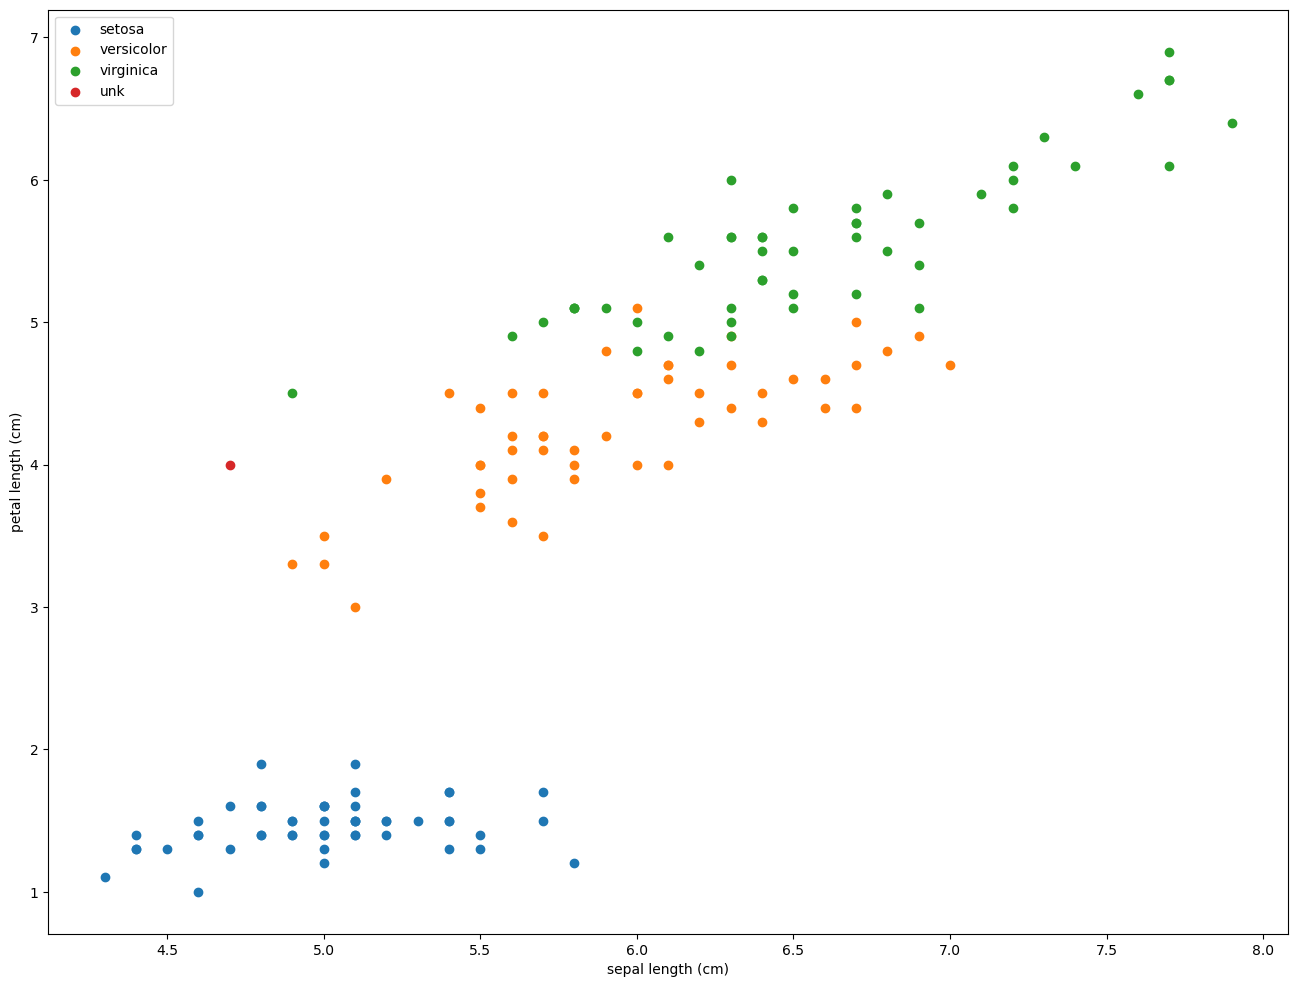

In [11]:
# отобразим данные для удобства восприятия, возьмем свойства sepal length (cm) и petal length (cm), попробуем спрогнозировать к какому классу принадлежит красная точка
plt.figure(figsize=(16, 12))

for i in range(3):
    plt.scatter(
        df.loc[df["label"] == i]["sepal length (cm)"], 
        df.loc[df["label"] == i]["petal length (cm)"],
        label=data["target_names"][i]
    )
plt.scatter([4.7], [4], label="unk")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.legend();

Сделаем предположение что точка будет принадлежать к тому классу, к точке которого она находится ближе всего

Для этого нам необходимо посчитать расстояние до всех точек, от заданной $\large{z}$ по формуле $\large{\sqrt{\sum_i^N(x_i - z)^2}}$

После этого нам необходимо найти наименьшее расстояние и взять класс этой точки

Заметим что для поиска наименьшего расстояния необходимо знать только порядок отношения (больше меньше) и не важны абсолютные значения, поэтому корень считать не обязательно, поскольку квадратичная функция для неотрицательных значений постоянно возрастающая и не меняет порядок отношения

In [12]:
class NN:
    
    def __init__(self):
        self.X = None # инициализируем X и y для того чтобы аттрибуты класса были предопределенны заранее
        self.y = None
    
    def fit(self, X, y):
        self.X = X # запоминаем данные внутри объекта
        self.y = y
    
    def predict(self, X):
        """
        self.X (N, 4)
        X (1, 4)
        """

        square_coords = (self.X - X) ** 2 # считаем квадраты разности координат от точки до наших данных
        distances = square_coords.sum(1) # суммируем квадраты координат вдоль стоблцов чтобы получить квадрат расстояния
        min_index = np.argmin(distances) # находим индекс минимального расстояния
        return self.y[min_index: min_index + 1] # возвращаяем класс по индексу

In [13]:
# для проверки алгорима нам необходимо разделить данные на тренировочные и проверочные, сделать это можно с помощью метода train_test_split в который передаются данные, метки
# аргументы test_size - размер проверочных данных, shuffle случайная сортировка перед разделением, random_state - ядро генератора случайных чисел для воспроизводимости

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

In [14]:
y # данные нужно перемешать чтобы не получить только 2ю метку в проверке

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
model = NN() # инициализирует объект модели

In [16]:
model.fit(train_X, train_y) # тренируем модель

In [17]:
# делаем предсказания модели

y_preds = []
for i in range(test_X.shape[0]):
    sample = test_X[i: i+1, :]
    prediction = model.predict(sample)
    y_preds.extend(prediction)

In [18]:
test_y

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [19]:
np.array(y_preds) # предсказания можно проверить глазами, но лучше посчитать accuracy

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [20]:
y_preds_array = np.array(y_preds) # переводим предсказания в массив 
is_same = (test_y == y_preds_array) # поэлементно сравниваем предсказания и действительные метки
is_same_count = is_same.sum() # поскольку True это 1 а False это 0, то сумма значений будет равна количеству совпадающих элементов
accuracy = is_same_count / test_y.shape[0] # делим количество совпадающих элементов на общее количество элементов чтобы узнать процент совпавших элементов

In [21]:
accuracy

1.0

In [22]:
# перепишем то что мы сделали в функцию для удобства

def test_model(X, y):
    train_X, test_X, train_y, test_y = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=42
    )
    model = NN()
    model.fit(train_X, train_y)
    y_preds = []
    for i in range(test_X.shape[0]):
        sample = test_X[i: i+1, :]
        prediction = model.predict(sample)
        y_preds.extend(prediction)
        
    y_preds_array = np.array(y_preds)
    is_same = (test_y == y_preds_array)
    is_same_count = is_same.sum()
    accuracy = is_same_count / test_y.shape[0]
    return accuracy

In [23]:
test_model(X, y)

1.0

In [24]:
X_break = X.copy() # сделаем копию наших данных

In [25]:
X_break[:, 0] *= 100 # умножим всю первую колонку на 100

In [26]:
test_model(X_break, y) # качество модели просело на 17%

0.8333333333333334

Разберемся что произошло, по нашей формуле квадрат расстояния равен

$$\large{d = (x_1 - z_1)^2 + (x_2 - z_2)^2 + (x_3 - z_3)^2 + (x_4 - z_4)^2}$$

мы домножили первую координату на 100

$$\large{d = (100 x_1 - 100 z_1)^2 + (x_2 - z_2)^2 + (x_3 - z_3)^2 + (x_4 - z_4)^2}$$

$$\large{d = 10^4(x_1 - z_1)^2 + (x_2 - z_2)^2 + (x_3 - z_3)^2 + (x_4 - z_4)^2}$$

Учитывая что все координаты были примерно равны, после умножения на 100 значение первой координаты стало важнее в $10^4$ раз и остальные свойства практически не влияют на модель

Такое может быть не только в искуственных данных, например в модели предсказывающей вернет ли человек кредит, в данных есть такие факторы как возраст и зарплата которые отличаются в 1000 раз

Для того чтобы данные влияли одинаково, необходимо их смаштабировать в одну систему координат, например от 0 до 1, для этого можно использовать min max нормализацию

$$\large{x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}}$$

In [27]:
def test_model_scaled(X, y):
    train_X, test_X, train_y, test_y = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=42
    )
    scaler = MinMaxScaler() # инициализируем класс min max нормализации
    scaler.fit(train_X) # тренируем объект, только на данных для обучения!
    scaled_train_X = scaler.transform(train_X) # масштабируем наши данные для обучения
    model = NN()
    model.fit(scaled_train_X, train_y)
    y_preds = []
    scaled_test_X = scaler.transform(test_X) # масштабируем наши данные для проверки
    for i in range(test_X.shape[0]):
        sample = scaled_test_X[i: i+1, :]
        prediction = model.predict(sample)
        y_preds.extend(prediction)
    return (test_y == np.array(y_preds)).sum() / test_y.shape[0]

In [28]:
test_model_scaled(X, y)

1.0

In [29]:
test_model_scaled(X_break, y)

1.0

Часто возникают ситуации когда данные имеют некорректные свойства, для разных точек, например у нас крайнее левая зеленая точка выбивается из кластера зеленых точек и возможно является выбросом и учитывая модель какая то область пространства будет неправильно классифицироваться вблизи этой точки.

Это можно исправить если мы будем считать расстояние не до одной точки а до K ближайших и возвращать тот класс который представлен наиболее часто в этих K

In [30]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [31]:
class KNN:
    
    def __init__(self, k):
        # k - количество ближайших соседей
        self.k = k
        self.X = None
        self.y = None
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):

        square_coords = (self.X - X) ** 2
        distances = square_coords.sum(1)
        min_indexes = np.argsort(distances)[:self.k] # argsort возвращает порядок индексов при правильной сортировке, возьмем первые k элементов
        values, counts = np.unique(self.y[min_indexes], return_counts=True) 
        # np.unique возвращает уникальные значения в массиве y[min_index] в котором находятся классы ближайших точек
        # return_counts = True так же возвращает количество каждого из уникальных значений
        max_count = np.argmax(counts) # берем индекс наибольшего количество
        return values[max_count: max_count + 1] # возвращаем класс с наибольшим количеством

In [32]:
def test_model_scaled_knn(X, y, k=3): # k - количество ближайших соседей
    train_X, test_X, train_y, test_y = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=42
    )
    scaler = MinMaxScaler()
    scaler.fit(train_X)
    scaled_train_X = scaler.transform(train_X)
    model = KNN(k)
    model.fit(scaled_train_X, train_y)
    y_preds = []
    scaled_test_X = scaler.transform(test_X)
    for i in range(test_X.shape[0]):
        sample = scaled_test_X[i: i+1, :]
        prediction = model.predict(sample)
        y_preds.extend(prediction)
    return (test_y == np.array(y_preds)).sum() / test_y.shape[0]

In [33]:
test_model_scaled_knn(X, y, 3)

1.0

In [34]:
test_model_scaled_knn(X_break, y, 3)

1.0

Перепишем нашу модель, на расчет расстояний сразу для всех предсказываемых точек

для этого воспользуемся методом cdist из scipy.spatial.distance

Поскольку numpy имеет C оптимизацию и работает полностью параллельно это будет быстрее

In [35]:
class KNN2D:
    
    def __init__(self, k):
        self.k = k
        self.X = None
        self.y = None
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        
        distances = cdist(X, self.X) # X - (M, D), self.X - (N, D), результат (M, N)
        min_indexes = np.argsort(distances, axis=1)[:, :self.k]
        labels = self.y[min_indexes]
        results = []
        for i in range(labels.shape[0]):
            row = labels[i]
            values, counts = np.unique(row, return_counts=True)
            max_count = np.argmax(counts)
            results.append(values[max_count])
        return np.array(results)

In [36]:
model = KNN2D(3)
model.fit(train_X, train_y)
pred = model.predict(test_X)
accuracy_score(test_y, pred)

1.0

In [37]:
class KNN2DProba:
    
    def __init__(self, k):
        self.k = k
        self.X = None
        self.y = None
        self.n_classes = None
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.n_classes = np.unique(y).size
    
    def predict_proba(self, X):
        
        distances = cdist(X, self.X)
        min_indexes = np.argsort(distances, axis=1)[:, :self.k]
        labels = self.y[min_indexes]
        results = []
        for i in range(labels.shape[0]):
            row = labels[i]
            values, counts = np.unique(row, return_counts=True)
            probas = np.zeros(self.n_classes)
            probas[values] = counts / counts.sum()
            results.append(probas)
        return np.array(results)
    
    def predict(self, X):
        probas = self.predict_proba(X)
        return np.argmax(probas, axis=1)

In [38]:
model = KNN2DProba(3)
model.fit(train_X, train_y)
pred = model.predict(test_X)
accuracy_score(test_y, pred)

1.0

In [39]:
model = KNN2DProba(3)
model.fit(train_X, train_y)
model.predict_proba(test_X)

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.

- Квадратичное $\large{k = \frac{15}{16}(1 - r^2)^2}$
- Кубическое $\large{k = \frac{70}{81}(1 - |r|^3)^3}$
- Гауссовское $\large{k = \frac{1}{\sqrt{2 \pi}} e^{- \frac{1}{2} r^2}}$

$$\large{r = \frac{dist_{i}}{radius}}$$

In [40]:
class ParzenWindow:
    
    def __init__(self, radius):
        self.radius = radius
        self.X = None
        self.y = None
        self.n_classes = None
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.n_classes = np.unique(y).size
        
    def kernel(self, r):
        return 1 - np.abs(r)
    
    def predict_proba(self, X):
        
        distances = cdist(X, self.X)
        results = []
        for i in range(distances.shape[0]):
            dist_row = distances[i]
            indexes = np.where(dist_row < self.radius)
            distances_lower = dist_row[indexes]
            r = distances_lower / self.radius
            k = self.kernel(r)
            labels = self.y[indexes]
            probas = np.zeros(self.n_classes)
            for c in range(self.n_classes):
                if (labels == c).sum() > 0:
                    probas[c] = k[labels == c].sum()
            probas /= probas.sum()
            results.append(probas)
        return results
    
    def predict(self, X):
        probas = self.predict_proba(X)
        return np.argmax(probas, axis=1)